**Datasets can be downloaded from https://www.dropbox.com/sh/zv6z7f3kzrafwmq/AACAlU8akbO_a-JOeJkiWT1za?dl=0**  
Ref: Buenrostro, J.D. et al. Integrated Single-Cell Analysis Maps the Continuous Regulatory Landscape of Human Hematopoietic Differentiation. Cell (2018).

In [1]:
%matplotlib inline

In [2]:
import stream as st
st.__version__

'0.3.8'

In [3]:
import stream_atac
stream_atac.__version__

'0.3.3'

For scATAC-seq analysis, STREAM can take as input a feature matrix, 

- e.g. k-mer feature matrix
- e.g. motif feature matrix

More details can be found https://github.com/pinellolab/STREAM_atac

In [4]:
adata = stream_atac.preprocess_atac(file_count='./count_file.tsv.gz',
                                    file_region='./region_file.bed.gz',
                                    file_sample='./sample_file.tsv.gz',
                                    genome = 'hg19',
                                    feature='motif')

Importing packages...
Installing pacakge 'bioconductor-bsgenome.hsapiens.ucsc.hg19' ...
Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/huidong/anaconda3/envs/stream_test

  added / updated specs:
    - bioconductor-bsgenome.hsapiens.ucsc.hg19


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bioconductor-bsgenome.hsapiens.ucsc.hg19-1.4.0|           r351_5           6 KB  bioconda
    ------------------------------------------------------------
                                           Total:           6 KB

The following NEW packages will be INSTALLED:

  bioconductor-bsge~ bioconda/noarch::bioconductor-bsgenome.hsapiens.ucsc.hg19-1.4.0-r351_5



bioconductor-bsgenom | 6 KB      | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Installing pacakge 

In [5]:
st.add_cell_labels(adata,file_name='./cell_label.tsv.gz')
st.add_cell_colors(adata,file_name='./cell_label_color.tsv.gz')

In [6]:
adata.shape

(2034, 386)

using all the genes ...
60 PCs are selected


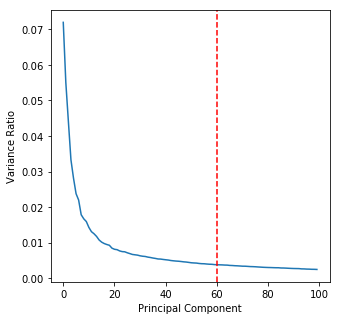

In [7]:
st.select_top_principal_components(adata,n_pc=60,first_pc=True)

#### Since there are only <400 matched motifs, we use all of them here

In [8]:
st.dimension_reduction(adata,feature='top_pcs',n_components=5)

feature top_pcs is being used ...
8 cpus are being used ...


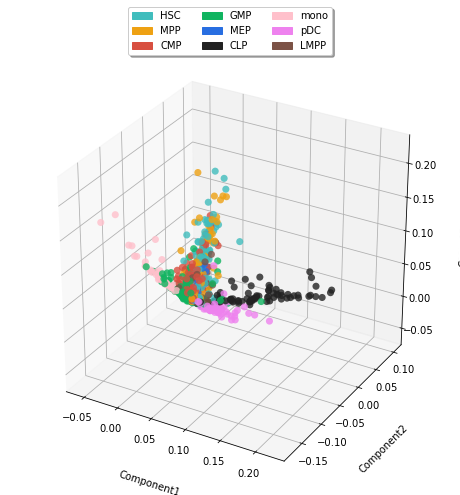

In [9]:
st.plot_dimension_reduction(adata)

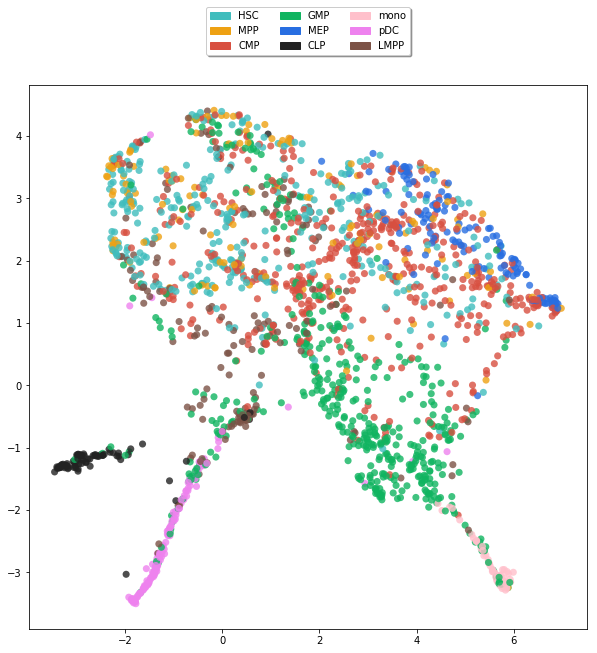

In [10]:
st.plot_visualization_2D(adata,use_precomputed=False)

In [11]:
st.seed_elastic_principal_graph(adata)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 6


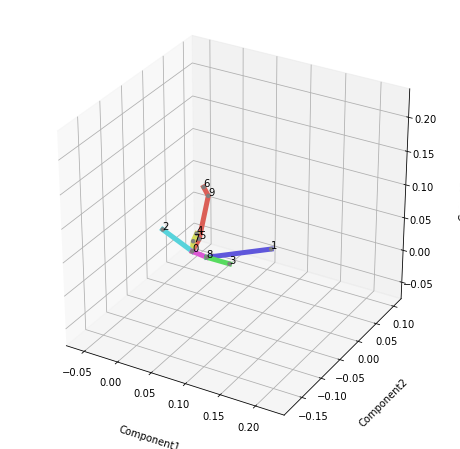

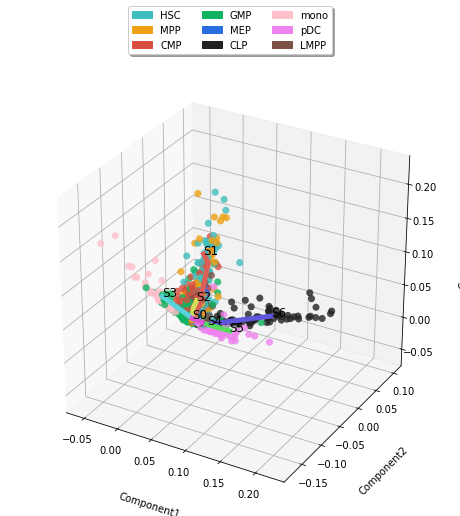

In [12]:
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 2034 points and 5 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1|1||50
	
0.0006115
	
50
	
49
	
43
	
1
	
0
	
0
	
0.0004391
	
0.0004298
	
0.8215
	
0.8252
	
0.0001468
	
2.569e-05
	
0.001285
	
0.06423
	
0


16.426 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 6


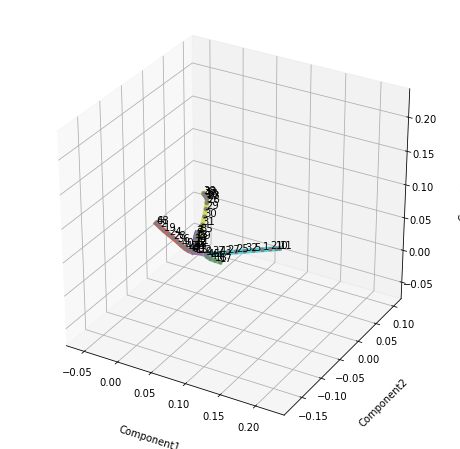

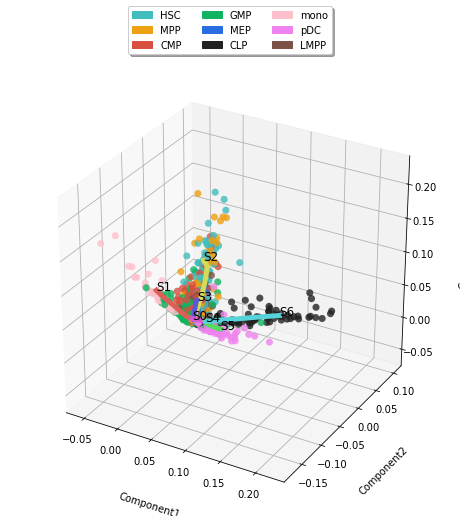

In [13]:
st.elastic_principal_graph(adata)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Extending leaves with additional nodes ...
Number of branches after extending leaves: 6


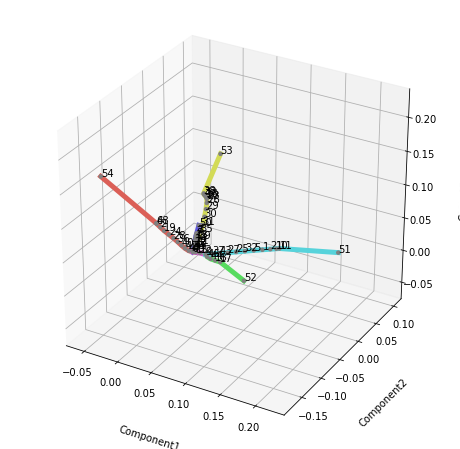

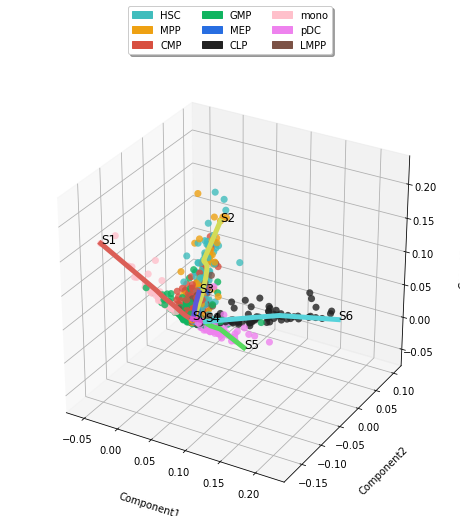

In [14]:
st.extend_elastic_principal_graph(adata)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

/Users/huidong/anaconda3/envs/stream_test/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


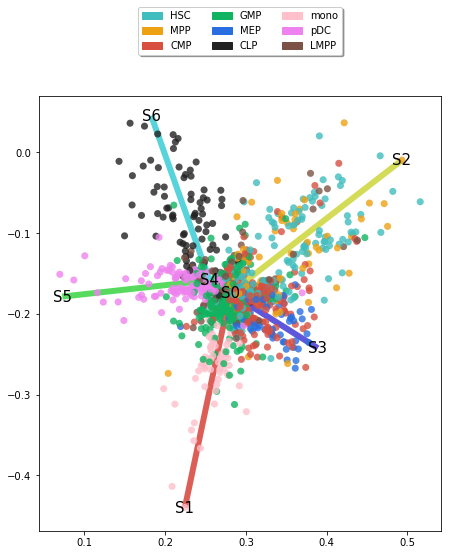

In [15]:
st.plot_flat_tree(adata)

Importing precomputed umap visualization ...
Importing precomputed umap visualization ...


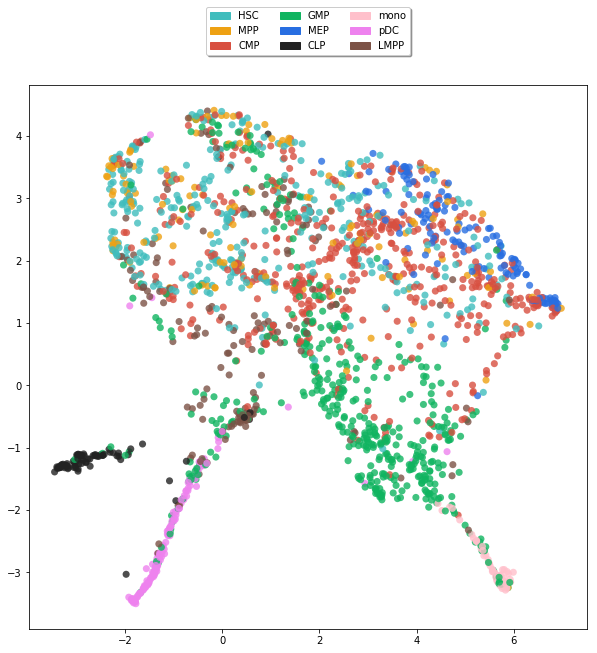

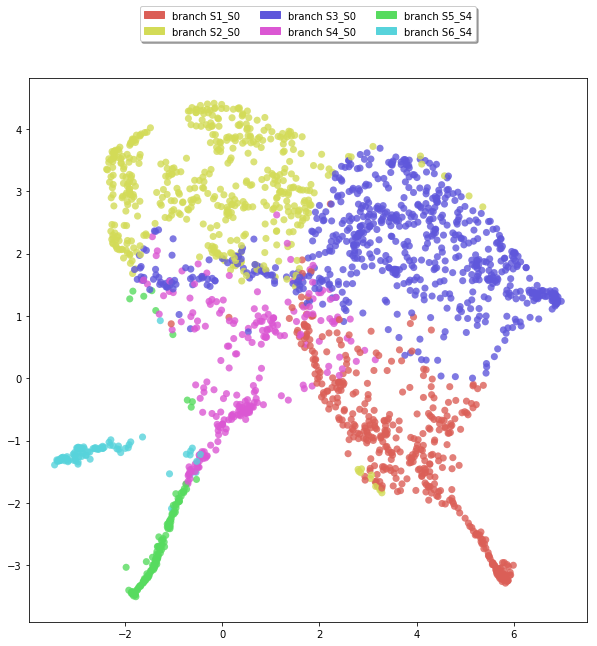

In [16]:
st.plot_visualization_2D(adata)
st.plot_visualization_2D(adata,color_by='branch')

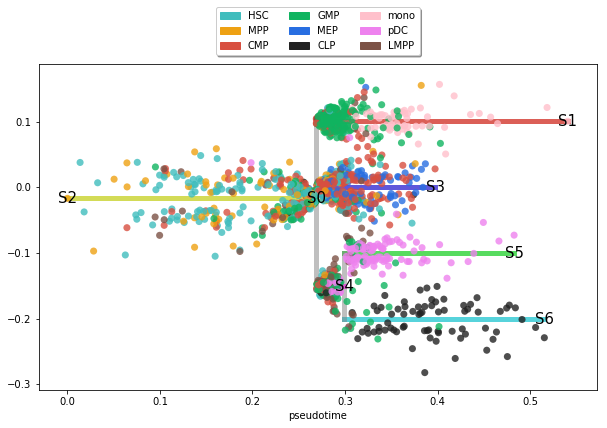

In [17]:
st.subwaymap_plot(adata,root='S2')

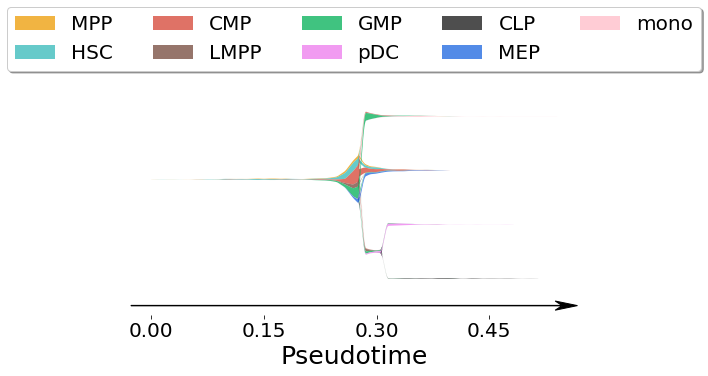

In [19]:
st.stream_plot(adata,root='S2',fig_legend_ncol=5,fig_size=(8,8))

For stream plot with **'thin branches'**, log2 view of stream plot (by specifying **'flag_log_view=True'**) will help zoom in the thin branches with very few cells by log2 transformation and visualize the composition of cells on the thin branches  
**factor_zoomin**: suggested value 50~200

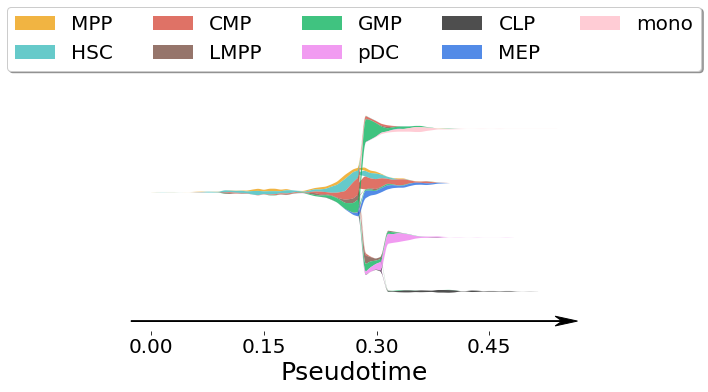

In [21]:
st.stream_plot(adata,root='S2',fig_legend_ncol=5,fig_size=(8,8),flag_log_view=True,factor_zoomin=50)

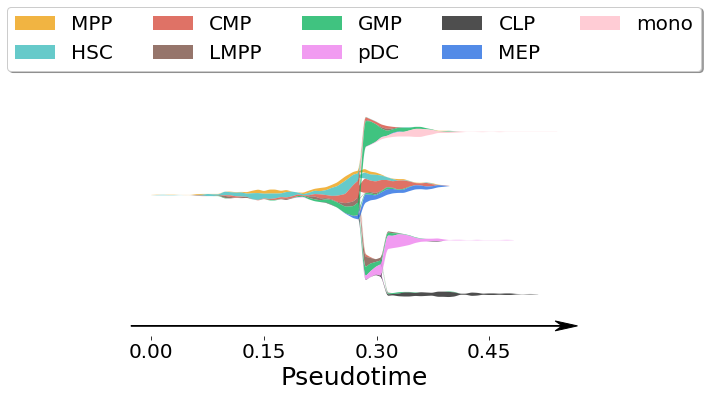

In [22]:
st.stream_plot(adata,root='S2',fig_legend_ncol=5,fig_size=(8,8),flag_log_view=True,factor_zoomin=100)

#### Detect marker motifs for each leaf branch

In [23]:
st.detect_leaf_genes(adata,root='S2')

Minimum number of cells expressing genes: 5


In [24]:
adata.uns['leaf_genes_all']

,zscore,H_statistic,H_pvalue,S2S0_pvalue,S0S1_pvalue,S0S3_pvalue,S4S5_pvalue,S4S6_pvalue
MA0140.2_GATA1::TAL1,1.808339,1038.347266,1.745437e-223,8.739091e-72,9.892596e-259,1.000000e+00,9.080396e-197,1.724304e-98
MA0036.2_GATA2,1.780744,1019.119115,2.565325e-219,4.541190e-67,1.724124e-249,1.000000e+00,3.413144e-181,1.172362e-109
MA0037.2_GATA3,1.820359,1002.277796,1.145423e-215,2.639634e-78,5.884071e-246,1.000000e+00,7.116667e-180,4.363397e-97
MA0766.1_GATA5,1.779715,981.443415,3.749640e-211,3.331140e-67,2.029775e-237,1.000000e+00,8.809505e-164,5.401318e-105
MA0050.2_IRF1,1.694488,891.746341,1.023120e-191,8.208313e-128,6.798821e-27,1.414743e-175,1.000000e+00,3.494915e-11
MA0517.1_STAT1::STAT2,1.703926,830.344163,2.052716e-178,6.131546e-111,2.143063e-28,5.037603e-165,1.000000e+00,1.718717e-10
MA0102.3_CEBPA,1.960094,769.599656,2.950666e-165,3.174124e-122,1.000000e+00,2.424327e-203,3.866031e-68,1.688103e-80
MA0838.1_CEBPG,1.951725,754.546872,5.370744e-162,6.021850e-127,1.000000e+00,1.224301e-189,3.146861e-73,6.397288e-88
MA0466.2_CEBPB,1.951354,753.407101,9.481517e-162,3.587633e-122,1.000000e+00,7.050715e-190,8.176093e-80,2.239034e-85
MA0837.1_CEBPE,1.957645,744.692652,7.314036e-160,3.518819e-122,1.000000e+00,1.523822e-188,1.752544e-78,3.979745e-79


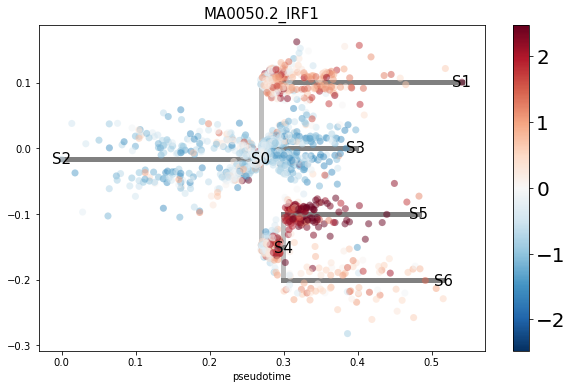

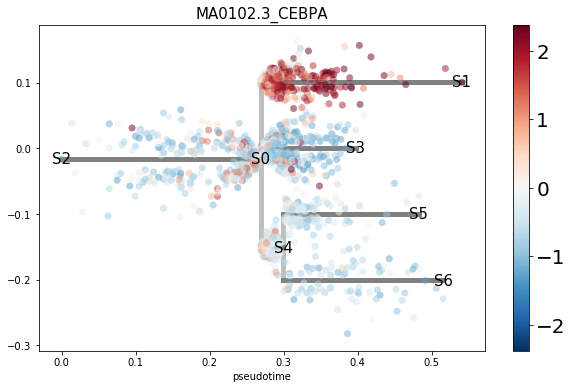

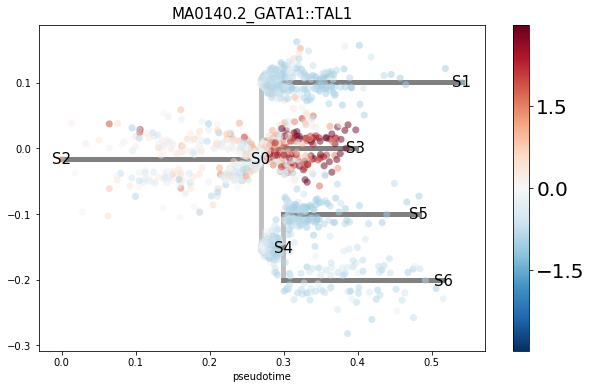

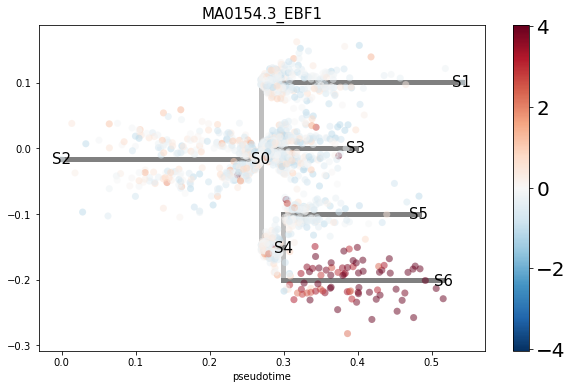

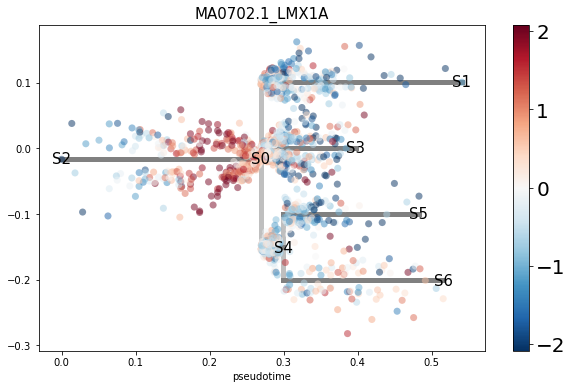

In [27]:
st.subwaymap_plot_gene(adata,root='S2',genes=['MA0140.2_GATA1::TAL1','MA0050.2_IRF1','MA0102.3_CEBPA',
                                             'MA0702.1_LMX1A','MA0154.3_EBF1'])

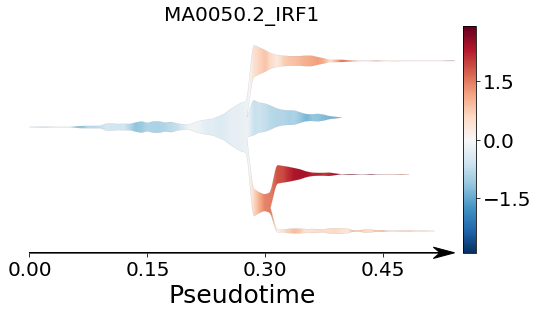

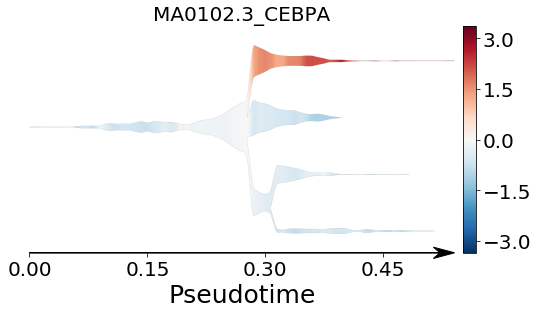

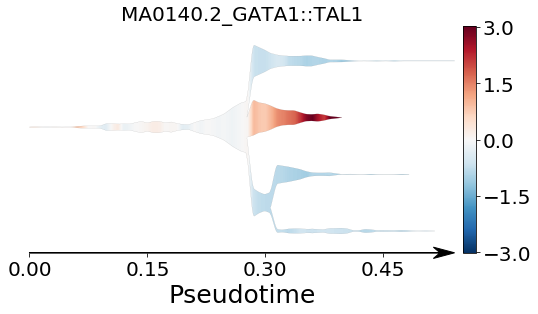

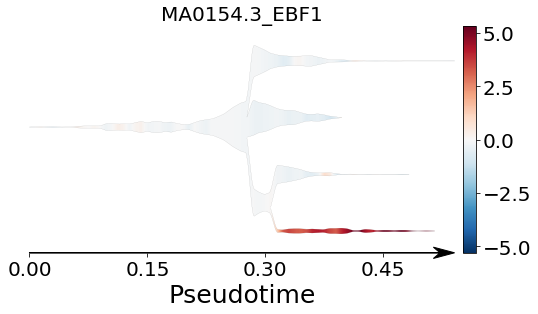

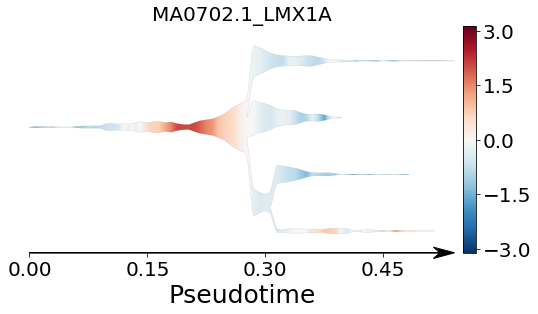

In [28]:
st.stream_plot_gene(adata,root='S2',genes=['MA0140.2_GATA1::TAL1','MA0050.2_IRF1','MA0102.3_CEBPA',
                                             'MA0702.1_LMX1A','MA0154.3_EBF1'],
                    fig_size=(8,8),flag_log_view=True,factor_zoomin=100)

#### Save results

In [29]:
st.write(adata)